<a href="https://colab.research.google.com/github/walteremoore/data_science/blob/main/Eda_limpieza_de_datos_inferencia_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eda, limpieza de datos, inferencia estadística

isologo-properati-claim.756d9e13.svg

---


#Configuraciones Iniciales
####Importamos las librerías que se utilizarán en el desarrollo del Workshop de Eda, limpieza de datos, inferencia estadística

In [ ]:
# Librerias
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import seaborn as sns
import re #regular expressions RegEx

!pip install geopandas

from shapely.geometry import Point
sns.set(style='white', color_codes=True)

%matplotlib inline
plt.rcParams["figure.figsize"] = (25, 10)

import geopandas as gpd

!git clone https://github.com/carabedo/geopandas.git

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6
!pip install basemap
!pip install basemap-data-hires
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# para redondear los resultados al imprimir en 2 decimales
np.set_printoptions(precision=2,suppress=True)

# Representar números decimales
pd.options.display.float_format = '{:,.2f}'.format

## Acerca de este dataset:

####El dataset contiene información sobre todas las propiedades georeferenciadas de la base de datos de la empresa. La información de cada propiedad que incluye es la siguiente:

*  ID de registro
*  Tipo de la propiedad (house, apartment, ph)
*  Operación del aviso (sell, rent)
*  Nombre del lugar
*  Nombre del lugar + nombre de sus ‘padres’
*  ID de geonames del lugar (si está disponible)
*  Latitud, longitud
*  Precio original del aviso
*  Moneda original del aviso (ARS, USD)
*  Precio del aviso en moneda local (ARS)
*  Precio aproximado en USD
*  Superficie en m2
*  Superficie cubierta en m2
*  Precio en USD/m2
*  Precio por m2
*  N° de piso, si corresponde
*  Ambientes
*  URL en Properati
*  Descripción
*  Título
*  URL de un thumbnail de la primera foto

#### A continuación realizamos la imporación de los archivos csv y los transformamos en dataframe utilizando la librería Pandas y las aplicaciones prácticas aprendidas durante el desarrollo del curso.

In [ ]:
#lo subi a una carpeta de gdrive y tengo que conectarme a la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#tuve que agregar referencia a mi carpeta gdrive peronal donde esta subido
gdrive_path ="/content/drive/MyDrive/WS1/"

In [ ]:
# Cargar el set de datos
df = pd.read_csv(gdrive_path + "properatti.csv", index_col=0)

# cargamos el archivo csv en un data frame.
geocsv = pd.read_csv(gdrive_path + "geonames.csv", index_col=0, encoding='latin1')

In [ ]:
df

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"3,430,787.00","-34.6618237,-58.5088387",-34.66,-58.51,...,40.00,"1,127.27","1,550.00",NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"3,432,039.00","-34.9038831,-57.9643295",-34.90,-57.96,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"3,430,787.00","-34.6522615,-58.5229825",-34.65,-58.52,...,55.00,"1,309.09","1,309.09",NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,"3,431,333.00","-34.6477969,-58.5164244",-34.65,-58.52,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,"3,435,548.00","-38.0026256,-57.5494468",-38.00,-57.55,...,35.00,"1,828.57","1,828.57",NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,"3,436,077.00",NaN,NaN,NaN,...,93.00,"7,699.12","9,354.84",NaN,NaN,"10,000.00",http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,"3,436,080.00",NaN,NaN,NaN,...,360.00,"1,383.33","1,383.33",NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,"3,433,775.00","-34.5706388726,-58.4755963355",-34.57,-58.48,...,39.00,"2,858.70","3,371.79",NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,...,48.00,"1,997.92","1,997.92",NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


#Detección de valores faltantes

####Comenzamos el análisis del dataset con una evaluación de los campos con valores nulos y su porcentaje respecto del total de registros, para determinar las estrategias a seguir durante el desarrollo.

In [ ]:
#Contamos nulos por columna
cant_nulls = df.isnull().sum()
cant_nulls

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [ ]:
#Porcentaje de Nulos respecto del total de filas
porc_nulos= cant_nulls / df.shape[0] * 100
porc_nulos

operation                     0.00
property_type                 0.00
place_name                    0.02
place_with_parent_names       0.00
country_name                  0.00
state_name                    0.00
geonames_id                  15.44
lat-lon                      42.53
lat                          42.53
lon                          42.53
price                        16.84
currency                     16.84
price_aprox_local_currency   16.84
price_aprox_usd              16.84
surface_total_in_m2          32.44
surface_covered_in_m2        16.42
price_usd_per_m2             43.39
price_per_m2                 27.69
floor                        93.48
rooms                        60.91
expenses                     88.23
properati_url                 0.00
description                   0.00
title                         0.00
image_thumbnail               2.57
dtype: float64

# Completar ambientes

####Para completar la cantidad de ambietes (rooms) utilizaremos la columna description y aplicando Regex intentaremos obtener valores para posteriormente reemplazar los nulls en el dataframe.

In [ ]:
# obtenemos cantidad de ambientes de la columna description para posteriormente completarlos en la columna rooms
df['description'] = df['description'].fillna('NaN')
patron_amb = r'(\d+)(\s)(\b(ambientes|ambiente|amb|cuarto|cuartos|habitacion|habitaciones|dormitorio|dormitorios|dorm|hab)\b)'

In [ ]:
# creamos una función para extraer los números que acompañan a la palabra ambientes

def extraer_informacion(dataframe,columna, patron):
    lista = []
    largo = len(dataframe)
    serie = dataframe[columna]
    for x in range(largo):
        string = serie.loc[x]
        match = re.search(patron, string, flags = re.IGNORECASE)
        
        if match:
            lista.append(int(match.group(1))) 
        else:
            lista.append(np.NaN)
    return lista

In [ ]:
# Ejecutamos la función para extraer los valores.
df['extraer_ambientes_desc'] = extraer_informacion(df,'description',patron_amb)
df['extraer_ambientes_titulo'] = extraer_informacion(df,'title',patron_amb)

In [ ]:
# Reemplazamos los valores nulos en la columna rooms
df['rooms'] = df['rooms'].fillna(df['extraer_ambientes_desc'][df['extraer_ambientes_desc'] < 8])
df['rooms'] = df['rooms'].fillna(df['extraer_ambientes_titulo'][df['extraer_ambientes_titulo'] < 8])

In [ ]:
# Controlamos como quedo la columna rooms nulos
df.drop(['extraer_ambientes_desc','extraer_ambientes_titulo'], axis=1, inplace=True)
df['rooms'].isnull().sum()

32336

# Completar las superficies total y cubierta

####Para completar las superficies utilizaremos la columna description y aplicando Regex intentaremos obtener valores para posteriormente reemplazar los nulls en el dataframe.

In [ ]:
# Utilizamos la descripcion disponible para buscar datos de la superficie
patron_superficie = r'(\d+)(\s?)(\b(m2)\b)'
df['description'] = df['description'].fillna('NaN')
df['super_ext_descrip'] = extraer_informacion(df,'description',patron_superficie)

In [ ]:
# Reemplazamos los datos obtenidos en las columnas
df['surface_total_in_m2'] = df['surface_total_in_m2'].fillna(df['super_ext_descrip'])
df['surface_covered_in_m2'] = df['surface_covered_in_m2'].fillna(df['super_ext_descrip'])
df.drop(['super_ext_descrip'], axis=1, inplace=True)

In [ ]:
# Comparamos la cantidad de nulos.
print(df['surface_total_in_m2'].isnull().sum())
print(df['surface_covered_in_m2'].isnull().sum())

33763
17516


# Tratamiento de columnas de ciudades

####Realizaremos la corrección en los nombres, limpieza de valores nulos, utilizando el contenido de la columna place_with_parent_names para completar la columna place_name, quitamos caracteres especiales.

In [ ]:
# extraer la 3er parte del campo place_with_parent_names para reemplazar el campo place_name (separador |)
# utilizamos este método porque nos pareció más adecuado para completar está columna, ya que de esta manera tenemos nombres más representativos de las ciudades
zona = df.place_with_parent_names.str.split('|', expand=True)
df['place_name'] = zona[3]

# Reemplazar los place_name que quedaron vacios debido al reemplazo del paso anterior con los valores del 2do lugar del campo place_with_parent_names (separador |)
# muchos casos no tenían 3 elemento dentro de la concatenación, por esta razón se carga el segundo elemento
df.loc[df['place_name']=='','place_name'] = zona[2]

# Quitamos caracteres especiales y ponemos todo a minuscula (ambos dataframe).
df['place_name'] = df['place_name'].str.lower()
geocsv['asciiname'] = geocsv['asciiname'].str.lower()

df['place_name'] = df['place_name'].str.replace('[ü]','u', regex=True)
df['place_name'] = df['place_name'].str.replace('[é]','e', regex=True)
df['place_name'] = df['place_name'].str.replace('[á]','a', regex=True)
df['place_name'] = df['place_name'].str.replace('[í]','i', regex=True)
df['place_name'] = df['place_name'].str.replace('[ó]','o', regex=True)
df['place_name'] = df['place_name'].str.replace('[ú]','u', regex=True)
df['place_name'] = df['place_name'].str.replace('[ñ]','n', regex=True)

geocsv['asciiname'] = geocsv['asciiname'].str.replace('[ü]','u', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[é]','e', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[á]','a', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[í]','i', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[ó]','o', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[ú]','u', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[ñ]','n', regex=True)

df['place_name'] = df['place_name'].str.replace('[¿,¡,\,^,.,_,`,{,|,},~,!,",#,$,%,&,(,),*,+,-,.,/,ð,,?,«,ø,#,@,&,`,´,]','', regex=True)
geocsv['asciiname'] = geocsv['asciiname'].str.replace('[¿,¡,\,^,_,`,.,{,|,},~,!,",#,$,%,&,(,),*,+,-,.,/,ð,,?,«,ø,#,@,&,`,´,]','', regex=True)

In [ ]:
# 2) Caso del campo: place_with_parent_names limpiar los que terminan con dos || separadores pleca
df['place_with_parent_names'] = df['place_with_parent_names'].replace("|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||", "|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|")
#df.iloc[6489,:]

# Completar geonames_id con dataframe de 'Geolocalizacion' 

Web: www.geonames.org dataset con los GeoName_ID de Argentina, tambien tiene latitud, longitud.

####completaremos los nulos de la columna geonames_id con lo que contiene la columna geonameid del csv de geolocalización citado en la línea superior

In [ ]:
# Casos donde tengo geonames_id nulos en el df original
df[df['geonames_id'].isnull()].head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
11,sell,house,san miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",-34.54,-58.72,...,NaN,NaN,NaN,NaN,2.00,NaN,http://www.properati.com.ar/15bp0_venta_casa_s...,"Entrada de Coche, Jardin, Living en desnivel, ...",CHALET,https://thumbs4.properati.com/4/pH0MnS_2zCGOHR...
17,sell,apartment,tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4087174767,-58.6343892841",-34.41,-58.63,...,78.00,"1,789.77","4,038.46",NaN,3.00,NaN,http://www.properati.com.ar/15bpl_venta_depart...,Excelente 3 ambientes en un 6 piso y con terra...,3 ambientes en venta en Acqua Golf 1 en Nordel...,https://thumbs4.properati.com/8/txJsOWitsI5tjM...
23,sell,apartment,pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,...,42.00,"1,708.33","1,952.38",NaN,2.00,NaN,http://www.properati.com.ar/15bqt_venta_depart...,"Hermoso departamento, ubicado en la calle Almi...","Excelente departamento, Impecable!!! APTO CRED...",https://thumbs4.properati.com/8/BHyv2zmce3bVoU...
26,sell,house,tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Barr...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.3640924,-58.6897345",-34.36,-58.69,...,190.00,"1,152.17","1,394.74",NaN,NaN,NaN,http://www.properati.com.ar/15bqx_venta_casa_b...,Casa en venta en complejo Villanueva barrio Sa...,Casa muy linda en San Gabriel Villanueva,https://thumbs4.properati.com/2/DWZjGcq_Z-PKSC...
27,sell,house,pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Esta...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4794863,-58.9845412",-34.48,-58.98,...,425.00,"1,529.41","1,529.41",NaN,NaN,NaN,http://www.properati.com.ar/15bqz_venta_casa_e...,Estancias propone vivir rodeados de naturaleza...,Excelente Propiedad!!!! en Estancias del Pilar,https://thumbs4.properati.com/9/5zWFkmq9zHuXyZ...


**Conceptos varios para el proximo tratamiento.**

**Diccionarios en Python**

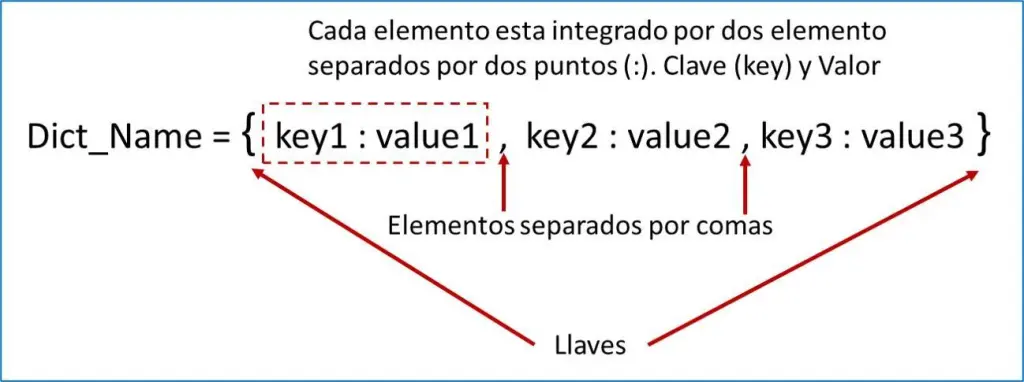

**Tuplas en Python**

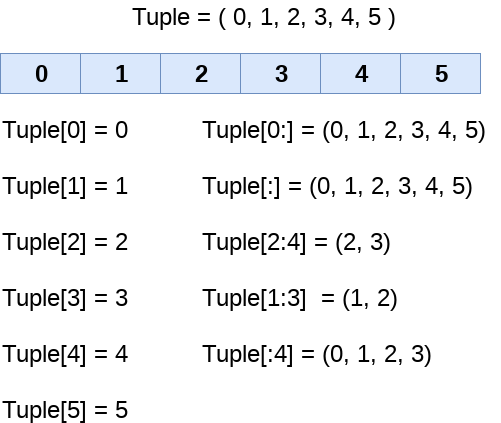

In [ ]:
# Armamos un diccionario para mapear el place name para conseguir los geonames_id según los place_name
placename_geo_dict = {}

# armamos una tupla con los pares de clave y valor del dataframe geocsv usando la función ZIP
geocsv_dict = zip(geocsv['asciiname'],geocsv['geonameid'])

# cargamos los datos del diccionario mediante un iterador con FOR
for name, geonameid in geocsv_dict:
    placename_geo_dict[name] = geonameid

In [ ]:
# utilizamos los valores del diccionario armado en el paso anterior para completar los faltantes con el dataframe original (mediante función MAP)
df.loc[df['geonames_id'].isnull(),'geonames_id'] = df['place_name'].map(placename_geo_dict)

In [ ]:
# tratamiento con valores geonames_id nulos que quedaron luego del tratamiento anterior con diccionario.
# creamos un nuevo dataframe donde cargamos los casos que tengamos geonames_id nulos.
geonames_nulos = df.loc[df['geonames_id'].isnull(),['place_name','place_with_parent_names','geonames_id']]

#volvemos a separar el campo place_with_parent_names en varias partes y las tratamos por separado
zona_nulos_geonames = geonames_nulos.place_with_parent_names.str.split('|', expand=True)

# excluimos las primeras dos partes, porque me dan pais, provincia. no me sirve mucho.
geonames_nulos['nombre1']=zona_nulos_geonames[3]
geonames_nulos['nombre2']=zona_nulos_geonames[4]

# tratamos los casos que continuan quedando nulos
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].dropna(how='all')
mask_nom1_blancos = geonames_nulos.loc[geonames_nulos['nombre1']==''].index
geonames_nulos.drop(mask_nom1_blancos, inplace = True)

# convertimos todo a minuscula, reemplazamos caracteres especiales.
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.lower()
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.lower()

geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[ü]','u', regex=True)
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[é]','e', regex=True)
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[á]','a', regex=True)
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[í]','i', regex=True)
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[ó]','o', regex=True)
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[ú]','u', regex=True)
geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[ñ]','n', regex=True)

geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[ü]','u', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[é]','e', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[á]','a', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[í]','i', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[ó]','o', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[ú]','u', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[ñ]','n', regex=True)

geonames_nulos['nombre1'] = geonames_nulos['nombre1'].str.replace('[¿,¡,\,^,.,_,`,{,|,},~,!,",#,$,%,&,(,),*,+,-,.,/,ð,,?,«,ø,#,@,&,`,´,]','', regex=True)
geonames_nulos['nombre2'] = geonames_nulos['nombre2'].str.replace('[¿,¡,\,^,.,_,`,{,|,},~,!,",#,$,%,&,(,),*,+,-,.,/,ð,,?,«,ø,#,@,&,`,´,]','', regex=True)

# borramos los duplicados porque no necesitamos para el proximo tratamiento.
geonames_nulos['nombre1'].drop_duplicates(inplace = True)
geonames_nulos['nombre2'].drop_duplicates(inplace = True)

# hacemos una copia del dataframe para completarlo luego.
geonames_nulos_merge = geonames_nulos

In [ ]:
# creamos un diccionario para tratar el primer campo segmentado de place_with_parent_names
geo_nulos_dict_n1 = {}

# recorremos el dataframe en el campo nombre1 para obtener cada elto y poder utilizar la funcion find para encontrar semejanzas en el dataframe geocsv
for nom1 in geonames_nulos['nombre1']:
  geocsv['busqueda1'] = geocsv['asciiname'].str.find(nom1)
  for k in geocsv[geocsv['busqueda1'] > -1]['geonameid']:
    geo_nulos_dict_n1[nom1]=k

In [ ]:
# borramos las filas con datos nulos en el campo nombre2, no le gusta al for.
mask_nom2_blancos = geonames_nulos.loc[geonames_nulos['nombre2']==''].index
geonames_nulos.drop(mask_nom2_blancos, inplace = True)

In [ ]:
# creamos un diccionario para tratar el segundo campo segmentado de place_with_parent_names
geo_nulos_dict_n2 = {}

# recorremos el dataframe en el campo nombre2 para obtener cada elto y poder utilizar la funcion find para encontrar semejanzas en el dataframe geocsv
for nom2 in geonames_nulos['nombre2']:
  geocsv['busqueda'] = geocsv['asciiname'].str.find(nom2)
  for j in geocsv[geocsv['busqueda'] > -1]['geonameid']:
    geo_nulos_dict_n2[nom2]=j

In [ ]:
# el resultado de ambos procesamientos anteriores son dos diccionarios, los que unificamos con la funcion MAP en el dataframe completo geonames_nulos_merge
geonames_nulos_merge.loc[geonames_nulos_merge['geonames_id'].isnull(),'geonames_id'] = geonames_nulos_merge['nombre2'].map(geo_nulos_dict_n2)
geonames_nulos_merge.loc[geonames_nulos_merge['geonames_id'].isnull(),'geonames_id'] = geonames_nulos_merge['nombre1'].map(geo_nulos_dict_n1)

In [ ]:
# borramos las columnas que no necesitamos para unificar los datos obtenidos con el data frame properati
geonames_nulos_merge.drop(['place_with_parent_names','nombre1','nombre2'], axis=1)			

,place_name,geonames_id
441,tres de febrero,"11,147,728.00"
684,tres de febrero,"7,522,185.00"
687,tres de febrero,"7,522,185.00"
747,tres de febrero,"7,522,185.00"
1661,esteban echeverria,"8,056,533.00"
...,...,...
119450,ezeiza,"11,146,803.00"
119734,esteban echeverria,"8,056,533.00"
119735,esteban echeverria,"8,056,533.00"
120080,tres de febrero,"7,522,185.00"


In [ ]:
# Amamos un nuevo diccionario con nombres y geoname_id del dataframe geonames_nulos_merge
geonames_nulos_merge_dict = {}

# Tuplas con nombres y geoname_id mediante la funcion ZIP
geonames_nulos_merge_tuplas = zip(geonames_nulos_merge['place_name'],geonames_nulos_merge['geonames_id'])

# Cargamos el diccionario mediante iterador FOR con los valores de la tupla con nombres y geoname_id
for place_name, geonames_id in geonames_nulos_merge_tuplas:
    geonames_nulos_merge_dict[place_name] = geonames_id

In [ ]:
# mapeamos con la función MAP el diccionario anterior contra los datos del dataframe original de properati para reemplazar datos faltantes.
df.loc[df['geonames_id'].isnull(),'geonames_id'] = df['place_name'].map(geonames_nulos_merge_dict)

# Tratamiento de Latitudes y Longitudes

####completaremos los nulos de las columnas lat, lon y lat-lon con lo que contiene la columna latin y long del csv de geolocalización utilizado en la sección anterior para posteriormente graficarlos en un mapa utilizando la librería geopandas

In [ ]:
# obtenemos las latitudes y longitudes nulas, luego para obtener esos datos acudimos al dataframe geocsv usando el geoname_id
df.loc[(df['geonames_id'].isnull())&(df['lat'].isnull()),['geonames_id','lat','lon']].head()

,geonames_id,lat,lon
7356,NaN,NaN,NaN
9436,NaN,NaN,NaN
15187,NaN,NaN,NaN
18262,NaN,NaN,NaN
21980,NaN,NaN,NaN


In [ ]:
# decidimos reemplazar los valores nulos del dataframe por las latitudes y longitudes correspondientes a la ciudad en que se encuentra localizada cada propiedad
# esto nos permitirá posteriormete graficarlo en un mapa

# Amamos un diccionario para buscar las latitudes
lat_dict = {}

# Tupla con los pares geonameid y latitude del dataframe geocsv
geocsv_lat = zip(geocsv['geonameid'],geocsv['latitude'])

# Cargamos el diccionario con los pares geonameid y latitude del dataframe geocsv
for geonameid, latitude in geocsv_lat:
    lat_dict[geonameid] = latitude

In [ ]:
# Amamos un diccionario para buscar las longitudes
lon_dict = {}

# Tupla con los pares geonameid y longitude del dataframe geocsv
geocsv_lon = zip(geocsv['geonameid'],geocsv['longitude'])

# Cargamos el diccionario con los pares geonameid y longitude del dataframe geocsv
for geonameid, longitude in geocsv_lon:
    lon_dict[geonameid] = longitude

In [ ]:
# Reemplazamos en el dataframe properatti los valores faltantes de latitud y longitud usando un mapeo con MAP y el diccionario de latitudes y longitudes, la clave maestra es el geonameid
df.loc[df['lat'].isnull(),'lat'] = df['geonames_id'].map(lat_dict)
df.loc[df['lon'].isnull(),'lon'] = df['geonames_id'].map(lon_dict)

In [ ]:
# Concatenamos el campo latitud-longitud para el data frame properatti tal como estan los demas registros para respetar el formato.
df.loc[(df['lat-lon'].isnull())&(df['lat'].notnull()),'lat-lon'] = df['lat'].astype(str)+','+df['lon'].astype(str)

In [ ]:
# Dado que no contamos con otra fuente de datos para continuar cargando valores en los campos: geonames_id y lat-lon
# siendo la cantidad de nulos intefior al 0.004% sobre el total consideramos que podemos eliminar los registros
# ya que no representan una cantidad considerable que pueda alterar el analisis posterior de la información.

mask_nulos_geonames = df.loc[df['geonames_id'].isnull()].index
df.drop(mask_nulos_geonames, inplace = True, axis=0)

mask_nulos_lat_lon = df.loc[df['lat-lon'].isnull()].index
df.drop(mask_nulos_lat_lon, inplace = True, axis=0)

In [ ]:
# Contar la cantidad de nulos que quedaron luego de todo el tratamiento anterior.
df.isnull().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                        0
lat-lon                            0
lat                                0
lon                                0
price                          20323
currency                       20324
price_aprox_local_currency     20323
price_aprox_usd                20323
surface_total_in_m2            33659
surface_covered_in_m2          17398
price_usd_per_m2               52441
price_per_m2                   33403
floor                         112787
rooms                          32181
expenses                      106492
properati_url                      0
description                        0
title                              0
image_thumbnail                 3105
dtype: int64

# Tratamiento de Precios

El data set incluye precios en distintas monedas, por este motivo vamos crear una nueva variable, precio en dólares, con el objetivo de pasar todos los precios a una única moneda.


In [ ]:
#El primer paso será crear una columna por cada moneda usando la función dummies
A_categories_divisa_dummies = pd.get_dummies(df.currency, drop_first = False)
A_categories_divisa_dummies.sample(5)

,ARS,PEN,USD,UYU
101976,0,0,1,0
68130,0,0,1,0
2356,0,0,0,0
75579,0,0,1,0
17968,0,0,1,0


In [ ]:
#El segundo paso será unir el dataframe resultante con el data set original, para esto usaremos la función concat. Verificamos el tamaño del dataframe resultante con un shape
df = pd.concat([df, A_categories_divisa_dummies], axis = 1)
df.shape

(120665, 29)

In [ ]:
#Verificamos la estructura del nuevo dataframe con la función describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geonames_id,"120,665.00","3,796,332.67","1,257,015.31","3,427,208.00","3,430,348.00","3,434,509.00","3,838,574.00","12,076,997.00"
lat,"120,665.00",-34.02,2.81,-54.82,-34.66,-34.58,-34.19,4.55
lon,"120,665.00",-59.71,2.61,-75.68,-60.65,-58.52,-58.41,-53.65
price,"100,342.00","468,829.46","2,264,931.94",0.00,"110,000.00","185,000.00","420,000.00","650,000,000.00"
price_aprox_local_currency,"100,342.00","4,233,270.70","6,916,786.70",0.00,"1,583,309.44","2,558,452.50","4,675,792.50","821,271,104.30"
price_aprox_usd,"100,342.00","239,920.13","392,008.09",0.00,"89,733.88","145,000.00","265,000.00","46,545,445.00"
surface_total_in_m2,"87,006.00",288.09,"8,564.42",0.00,50.00,84.00,200.00,"2,018,250.00"
surface_covered_in_m2,"103,267.00",142.89,"1,501.49",0.00,45.00,75.00,150.00,"420,180.00"
price_usd_per_m2,"68,224.00","2,163.47","2,765.68",0.60,"1,219.38","1,804.02","2,490.67","206,333.33"
price_per_m2,"87,262.00","6,926.18","28,437.59",1.51,"1,550.00","2,216.67","3,361.57","3,999,999.96"


Por último operamos matemáticamente para aplicar el tipo de cambio vigente correspondiente al prime semestre del año 2017. Hemos todado el tipo de cambio de:

https://es.investing.com/currencies/usd-ars-converter

In [ ]:
C_ARS = 16
C_UYU = 28.43
C_PEN = 3.25

df = df.assign(price_dollar = 
               df.price.mul(df.ARS.div(C_ARS))
                # Dividimos la nueva variable dummies que será 0 o 1 por la cotización y luego multiplicamos por la variable precio original
               +df.price.mul(df.UYU.div(C_UYU)) # repetimos el procedimiento para pesos uruguayos y sumamos
               +df.price.mul(df.PEN.div(C_PEN)) # repetimos el procedimiento para sol peruano y sumamos
               +df.price.mul(df.USD))# Multiplicamos por variable dummies y sumamos. Siempre que la variable dummies sea cero anulará todo el término
df.sample(20).loc[:, ['price', 'ARS', 'PEN', 'UYU','price_dollar','price_aprox_local_currency','price_aprox_usd']]

,price,ARS,PEN,UYU,price_dollar,price_aprox_local_currency,price_aprox_usd
107831,"5,400,000.00",1,0,0,"337,500.00","5,343,669.46","302,851.85"
75534,"280,000.00",0,0,0,"280,000.00","4,940,460.00","280,000.00"
92213,"320,000.00",0,0,0,"320,000.00","5,646,240.00","320,000.00"
111784,"97,000.00",0,0,0,"97,000.00","1,711,516.50","97,000.00"
93890,"375,000.00",0,0,0,"375,000.00","6,616,687.50","375,000.00"
83397,"1,230,000.00",1,0,0,"76,875.00","1,217,169.13","68,982.92"
45709,"340,000.00",0,0,0,"340,000.00","5,999,130.00","340,000.00"
50481,"280,000.00",0,0,0,"280,000.00","4,940,460.00","280,000.00"
73093,"95,000.00",0,0,0,"95,000.00","1,676,227.50","95,000.00"
97368,NaN,0,0,0,NaN,NaN,NaN


In [ ]:
df_filtro_atipicos = df[(df.price_dollar < df.price_dollar.quantile(.95)) & 
                               (df.price_dollar > df.price_dollar.quantile(.02))]
df_filtro_atipicos.shape

(92929, 30)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


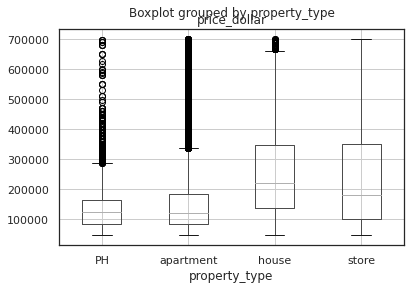

In [ ]:
df_price_type = df_filtro_atipicos.loc[:, ['price_dollar','property_type']]
df_price_type.boxplot(column='price_dollar', by='property_type')

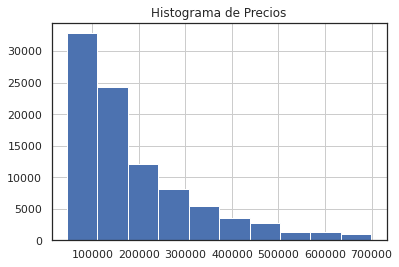

In [ ]:
#Matplotlib
bin=10
plt.hist(df_filtro_atipicos['price_dollar'])
#plt.xlabel('Dollar')
#plt.ylabel('Counts')
plt.title('Histograma de Precios')

plt.grid(True)

**Conclusión:** La distribución de la variable precio presenta una asimetría a la derecha, implica que Moda < Mediana < Media

# Tratamiento de datos con errores

#### Realizaremos un tratamiento de los registros asociados a campos con errores de carga

## Controlaremos que la superficie total no sea menor que la sup. cubierta.

In [ ]:
# Cargamos los datos erroneos en la superficie un nuevo DataFrame.
error_superficie = df[df['surface_total_in_m2']<df['surface_covered_in_m2']]
error_superficie.count()

operation                     2710
property_type                 2710
place_name                    2710
place_with_parent_names       2710
country_name                  2710
state_name                    2710
geonames_id                   2710
lat-lon                       2710
lat                           2710
lon                           2710
price                         2417
currency                      2417
price_aprox_local_currency    2417
price_aprox_usd               2417
surface_total_in_m2           2710
surface_covered_in_m2         2710
price_usd_per_m2              1133
price_per_m2                  2233
floor                          343
rooms                         2095
expenses                       139
properati_url                 2710
description                   2710
title                         2710
image_thumbnail               2656
ARS                           2710
PEN                           2710
USD                           2710
UYU                 

In [ ]:
# Consideramos que posiblemente se cargaron mal estos datos, por lo cual, invertiremos los valores para poder obtener
# valores más representativos con la realidad. La sup. total no puede ser menor que la cubierta en m2.
df.at[error_superficie.index, 'surface_total_in_m2'] = error_superficie.surface_covered_in_m2
df.at[error_superficie.index, 'surface_covered_in_m2'] = error_superficie.surface_total_in_m2

## Sacamos los registros del DataFrame que no tengan precios de m2.

In [ ]:
# Filtramos los registros que no tienen precio en dólares por metro cuadrado, ya que no contribuyen al modelo de regresión a futuro.
df = df.loc[df.price_usd_per_m2.notnull(),:]

# Analisis de la Información

#### A partir de este punto comenzaremos a realizar el análisis de la información contenida en el dataframe, utilizando las herramientas y técnicas apredidas a lo largo del curso

## Categorizar los tipos de propiedades

#### Identificamos los tipos de propiedades disponibles en el dataset

In [ ]:
# Identificamos la cantidad de valores unicos que tenemos en la columna: property_type del DataFrame Properatti
df.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

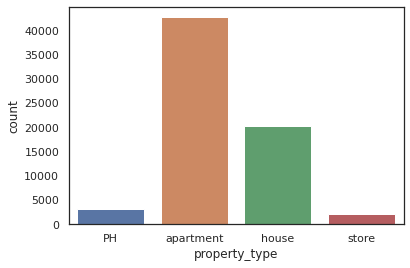

In [ ]:
# Representaremos las 4 categorías en un grafico para visualizar su representatividad en el DataFrame
type_property = sns.countplot(x="property_type", data=df)

## Ranking de las provincias con más edificios, casas, ph, stores.

Este ranking nos permitira conocer de acuerdo a una segmentación por provincias, cuales presentan una tendencia a cada tipo de propiedad, algunas tendran inclinación al tipo residencial con mayor cantidad de casas, otras a lo comercial con tiendas, otras a las propiedades horizontales y edificios. Lo que nos permite definir una tendencia relacionada con los costos acorde a las señales del mercado inmobiliario para cada segmento habitacional / comercial.

In [ ]:
# Contamos la cantidad de propiedades por state_name
array_provincias_x_tipo = df.groupby('state_name')['property_type'].count()
array_provincias_x_tipo

state_name
Bs.As. G.B.A. Zona Norte        17405
Bs.As. G.B.A. Zona Oeste         4623
Bs.As. G.B.A. Zona Sur           6173
Buenos Aires Costa Atlántica     6081
Buenos Aires Interior            1011
Capital Federal                 23357
Catamarca                           6
Chaco                              28
Chubut                            125
Corrientes                        315
Córdoba                          3673
Entre Ríos                         81
Formosa                            29
Jujuy                               4
La Pampa                           10
La Rioja                            1
Mendoza                           310
Misiones                          193
Neuquén                           240
Río Negro                         214
Salta                              63
San Juan                            2
San Luis                          137
Santa Cruz                         11
Santa Fe                         3958
Santiago Del Estero                 3
T

In [ ]:
#obtenemos el porcentaje de cada tipo de propiedad para cada state_name
porc_PH = df[df.property_type == 'PH'].groupby('state_name').count().property_type / array_provincias_x_tipo*100
porc_apartment = df[df.property_type == 'apartment'].groupby('state_name').count().property_type/array_provincias_x_tipo*100
porc_house = df[df.property_type == 'house'].groupby('state_name').count().property_type/array_provincias_x_tipo*100
porc_store = df[df.property_type == 'house'].groupby('state_name').count().property_type/array_provincias_x_tipo*100

#ordenamos los porcentajes de mayor a menor los porcentajes para obtener un ranking que nos permita graficar posteriormente
porc_PH.sort_values(ascending=False, inplace=True)
porc_apartment.sort_values(ascending=False, inplace=True)
porc_house.sort_values(ascending=False, inplace=True)
porc_store.sort_values(ascending=False, inplace=True)

In [ ]:
#Vemos como quedó el ranking, mostramos sólo el top 5
print("Top 5 provincias con mayor porcentaje de PHs: \n", porc_PH[:5],'%')
print("Top 5 provincias con mayor porcentaje de Departamentos: \n", porc_apartment[:5],'%')
print("Top 5 provincias con mayor porcentaje de Casas: \n", porc_house[:5],'%')
print("Top 5 provincias con mayor porcentaje de Tiendas: \n", porc_store[:5],'%')

Top 5 provincias con mayor porcentaje de PHs: 
 state_name
Neuquén                        29.17
Corrientes                     11.11
Bs.As. G.B.A. Zona Oeste       10.36
Buenos Aires Costa Atlántica    5.92
Capital Federal                 5.41
Name: property_type, dtype: float64 %
Top 5 provincias con mayor porcentaje de Departamentos: 
 state_name
Formosa           100.00
Capital Federal    84.93
Santa Fe           82.77
Tucumán            73.43
Córdoba            66.05
Name: property_type, dtype: float64 %
Top 5 provincias con mayor porcentaje de Casas: 
 state_name
La Rioja     100.00
Catamarca    100.00
Santa Cruz    90.91
San Luis      87.59
Jujuy         75.00
Name: property_type, dtype: float64 %
Top 5 provincias con mayor porcentaje de Tiendas: 
 state_name
La Rioja     100.00
Catamarca    100.00
Santa Cruz    90.91
San Luis      87.59
Jujuy         75.00
Name: property_type, dtype: float64 %


In [ ]:
# Graficamos para obtener una mejor idea de como se distribuyen estos valores acorde a cada ciudad
# obtenemos los indices
provincias_casas = porc_house[:5].index
provincias_edificios = porc_apartment[:5].index
provincias_ph = porc_PH[:5].index
provincias_tiendas = porc_store[:5].index

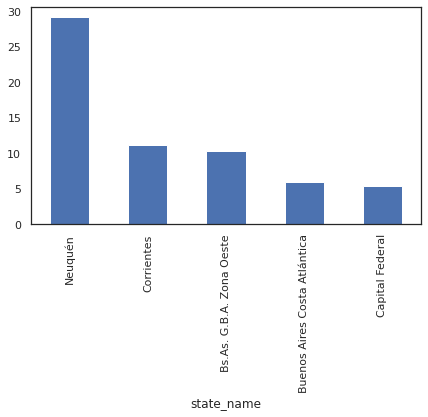

In [ ]:
# Top 5 provincias con mayor porcentaje de PHs
top5_ph = porc_PH[:5]
top5_ph.plot(kind = 'bar',
             alpha = 1.0,
             width = 0.5,
             figsize=(7,4));

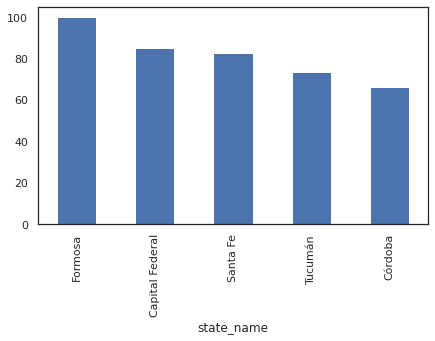

In [ ]:
# Top 5 provincias con mayor porcentaje de Departamentos
top5_apartment = porc_apartment[:5]
top5_apartment.plot(kind = 'bar',
             alpha = 1.0,
             width = 0.5,
             figsize=(7,4));

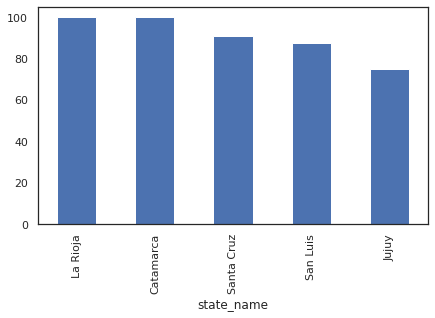

In [ ]:
# Top 5 provincias con mayor porcentaje de Casas
top5_house = porc_house[:5]
top5_house.plot(kind = 'bar',
             alpha = 1.0,
             width = 0.5,
             figsize=(7,4));

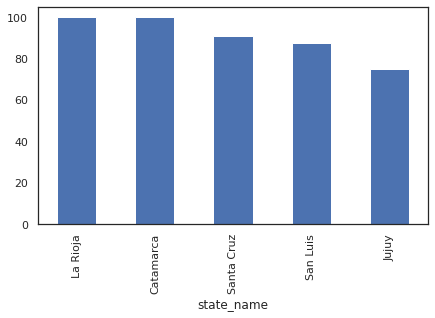

In [ ]:
# Top 5 provincias con mayor porcentaje de Tiendas
top5_store = porc_store[:5]
top5_store.plot(kind = 'bar',
             alpha = 1.0,
             width = 0.5,
             figsize=(7,4)); 

## Correlacion entre las variables.

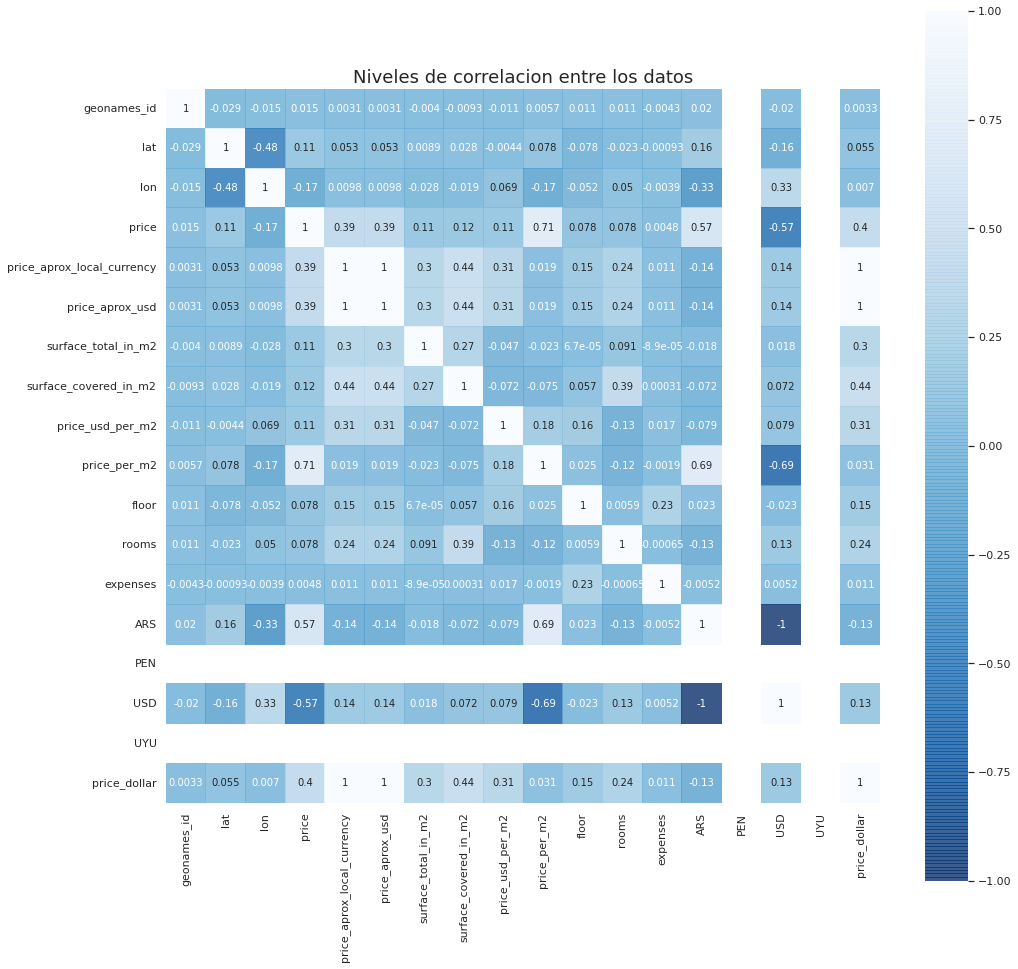

In [ ]:
# Graficamos la matriz de correlación de las variables del DataFrame para intentar determinar el grado de correlación 
# entre cada una de las variables del modelo y establecer nuevas maneras de realizar análisis y obtener conclusiones
fig, ax = plt.subplots(figsize=(16,16))
ax.set_title('Niveles de correlacion entre los datos', fontsize=18)       
sns.heatmap(df.corr() , square=True, annot=True, cmap='Blues_r', alpha=0.8, ax=ax);
plt.show();


## Ciudades más y menos costosas

Realizaremos un análisis del precio por m2 en dolarés para todas las propiedades. Para esto removeremos los valores extremos (outlier).

In [ ]:
# observamos el comportamiento del campo precio por m2 para establecer los parámetros adecuados para eliminar los outliers 
# y estudiar su comportamiento posterior a la limpieza (controlar que la representatividad posterior a la limpieza sea silmilar a la de los datos originales)
df.price_usd_per_m2.describe()

count    68,224.00
mean      2,163.47
std       2,765.68
min           0.60
25%       1,219.38
50%       1,804.02
75%       2,490.67
max     206,333.33
Name: price_usd_per_m2, dtype: float64

In [ ]:
# obtenmos los mismos valores pero utilizando las fuciones min, max, mean...
minimo=df.price_usd_per_m2.min()
maximo=df.price_usd_per_m2.max()
media=df.price_usd_per_m2.mean()
mediana=df.price_usd_per_m2.median()
desv_estandar=df.price_usd_per_m2.std()

print('maximo = {a}\nminimo: {b}\nmedia= {c}\nmediana= {d}\ndesvio estandar = {e}' .format(a=maximo, b=minimo, c=media, d=mediana, e=desv_estandar))

maximo = 206333.3333333333
minimo: 0.6
media= 2163.4726079837787
mediana= 1804.024714285714
desvio estandar = 2765.677623212386


In [ ]:
# Mostraremos el primer y tercer cuartil y luego también el rango intercuartil completo para evaluar los valores outliers.
df.price_usd_per_m2.quantile([0.25,0.75])

0.25   1,219.38
0.75   2,490.67
Name: price_usd_per_m2, dtype: float64

In [ ]:
# calculamos los rangos intercuartil para determinar cuál es el espectro de valores que debemos consevar
Q1= df.price_usd_per_m2.quantile(0.25)
Q3= df.price_usd_per_m2.quantile(0.75)
IQR = Q3 - Q1
IQR

1271.2873922171611

In [ ]:
# Eliminamos los valores extremos (outliers).
# Quitaremos los registros para nuestro analisis cuyos precios por m2 estén fuera de los percentiles equivalentes al 10% y 90%.
mask_cuartiles = df['price_usd_per_m2']
p10 = mask_cuartiles.quantile(q=0.1)
p90 = mask_cuartiles.quantile(q=0.9)
df = df[(df.price_usd_per_m2 >= p10) & (df.price_usd_per_m2 <= p90)]

In [ ]:
# volvemos a calcular todos los valores anteriores para visualizar como afecto a las diferentes métricas la quita de los valores extremos.
maximo=df.price_usd_per_m2.max()
media=df.price_usd_per_m2.mean()
mediana=df.price_usd_per_m2.median()
desv_estandar=df.price_usd_per_m2.std()

print('maximo = {a}\nminimo: {b}\nmedia= {c}\nmediana= {d}\ndesvio estandar = {e}' .format(a=maximo, b=minimo, c=media, d=mediana, e=desv_estandar))

maximo = 3250.0
minimo: 0.6
media= 1845.4179520363073
mediana= 1804.7465517241376
desvio estandar = 643.9097456386178


## Graficamos las provincias según el precio por m2 en USD.

<Figure size 432x288 with 0 Axes>

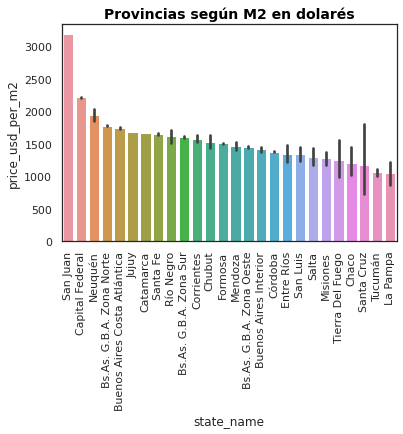

<Figure size 432x288 with 0 Axes>

In [ ]:
# Todas las provincias agrupadas por precio de M2 en dolarés.
plt.xticks(rotation = 90)
plt.title("Provincias según M2 en dolarés", 
          fontdict={'family': 'DejaVu Sans', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 14})
provincias = df.groupby('state_name').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="state_name", y="price_usd_per_m2", order=provincias, data=df);
plt.figure()

<Figure size 432x288 with 0 Axes>

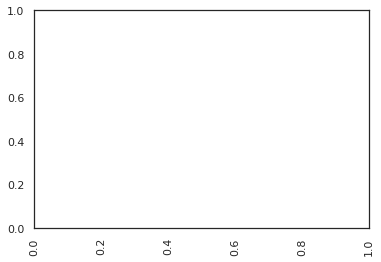

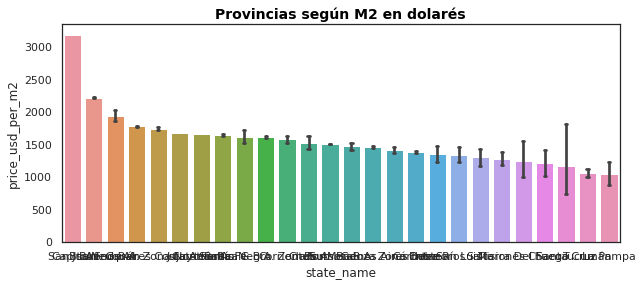

<Figure size 432x288 with 0 Axes>

In [ ]:
# Todas las provincias agrupadas por precio de M2 en dolarés.
plt.xticks(rotation = 90)
plt.figure(figsize=(10,4))
plt.title("Provincias según M2 en dolarés", 
          fontdict={'family': 'DejaVu Sans', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 14})
provincias = df.groupby('state_name').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="state_name", y="price_usd_per_m2", order=provincias, data=df,capsize=.1);
plt.figure()

## Top 5 Provincias más costosas en M2 dolarés

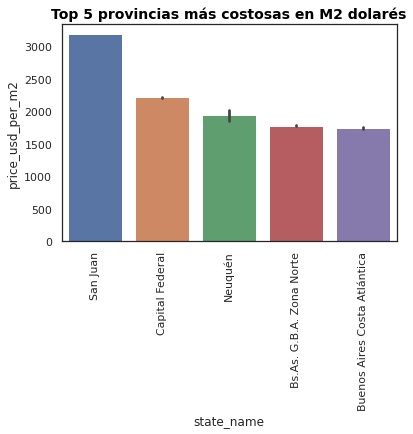

In [ ]:
# Top 5 provincias más costosas en M2 dolarés
plt.xticks(rotation = 90)
plt.title("Top 5 provincias más costosas en M2 dolarés", 
          fontdict={'family': 'DejaVu Sans', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 14})
provincias = df.groupby('state_name').mean().sort_values('price_usd_per_m2', ascending=False).index[:5]
sns.barplot(x="state_name", y="price_usd_per_m2", order=provincias, data=df);

## Top 5 Provincias menos costosas en m2 dolarés

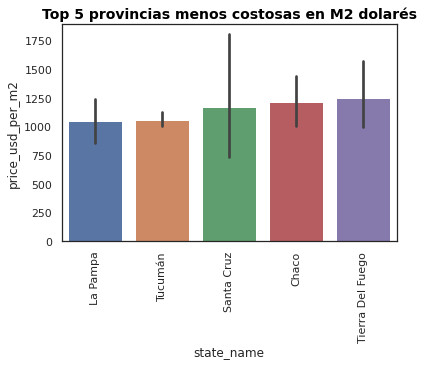

In [ ]:
# Top 5 provincias menos costosas en M2 dolarés
plt.xticks(rotation = 90)
plt.title("Top 5 provincias menos costosas en M2 dolarés", 
          fontdict={'family': 'DejaVu Sans', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 14})
provincias = df.groupby('state_name').mean().sort_values('price_usd_per_m2', ascending=True).index[:5]
sns.barplot(x="state_name", y="price_usd_per_m2", order=provincias, data=df);

## Cuál es el tipo de propiedad más costosa en USD por m2.

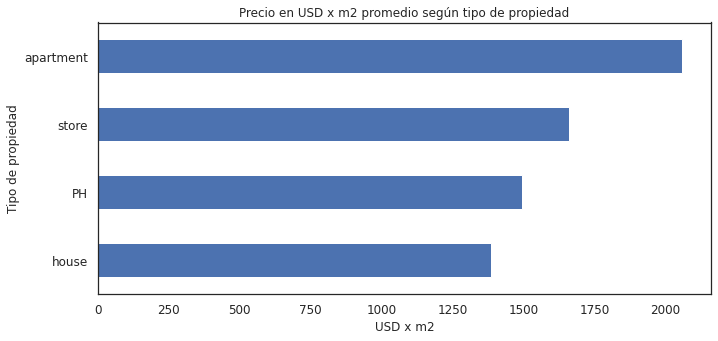

In [ ]:
# Graficamos según el tipo de propiedad y su equivalente precio en USD x m2.
df_property_type = df.groupby('property_type').mean()['price_usd_per_m2'].sort_values(ascending=False)[0:4]
grafico = df_property_type.sort_values().plot.barh(figsize=(11,5),fontsize=12, color='b')
grafico.set_title("Precio en USD x m2 promedio según tipo de propiedad", fontsize=12)
grafico.set_ylabel("Tipo de propiedad", fontsize=12)
grafico.set_xlabel("USD x m2", fontsize=12)
plt.show()

## Graficamos por cantidas de pisos.

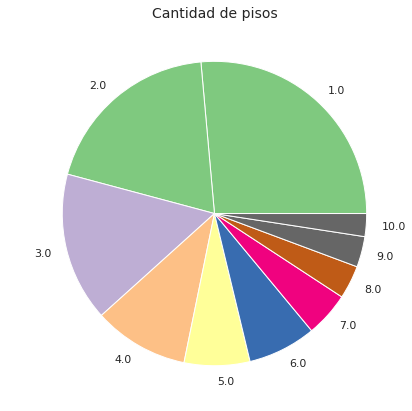

In [ ]:
# realizamos una representación en grafíco circular para observar cuál es la tendencia sobre el total de propiedades en relación a la variable pisos (floor)
pisos = df.loc[df['floor'] <11,['floor','price_usd_per_m2']]
pisos.groupby('floor').size().plot(kind='pie', figsize=(7,7), fontsize= 11,cmap="Accent")
plt.title('Cantidad de pisos', fontsize=14);
plt.ylabel(' ');
plt.show();

## Comparaciones entre provincias más costosas y más económicas

Contamos con las provincias más caras y las más baratas. Pero realmente no podemos dimensionar cuales son las diferencias entre unas y otras.
Para ello, concatenaremos 3 variables con el objetivo de transponerlas y poder entender la relación entre las mismas acorde a cada situación socio-económica y de mercado.

*   Precio en dólares por m2.
*   Cantidad de ambientes.
*   Superficie total en m2.



In [ ]:
provincias_costosas = df.groupby('state_name').mean().sort_values('price_usd_per_m2', ascending=False).index[:5]
provincias_economicas = df.groupby('state_name').mean().sort_values('price_usd_per_m2', ascending=True).index[:5]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


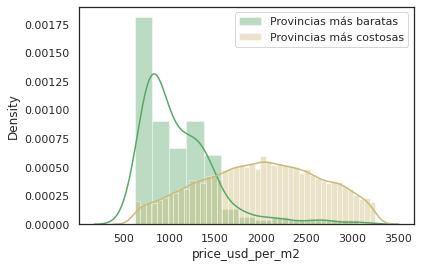

In [ ]:
# Comparación de provincias por precio del m2 en dólares.
precio_prov_m2 = sns.distplot(df[df.state_name.isin(provincias_economicas)].price_usd_per_m2, label="Provincias más baratas", color ="g")
sns.distplot(df[df.state_name.isin(provincias_costosas)].price_usd_per_m2, label="Provincias más costosas", color="y")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


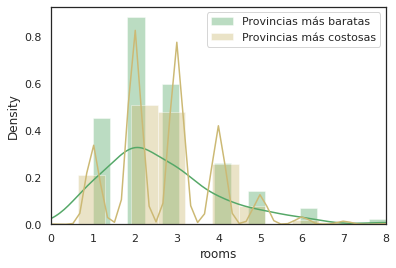

In [ ]:
# Comparación de provincias por cantidad de ambientes.
prov_cant_ambientes = sns.distplot(df[df.state_name.isin(provincias_economicas)].rooms, label="Provincias más baratas", color ="g")
sns.distplot(df[df.state_name.isin(provincias_costosas)].rooms, label="Provincias más costosas", color ="y")
prov_cant_ambientes.set_xlim(0, 8)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


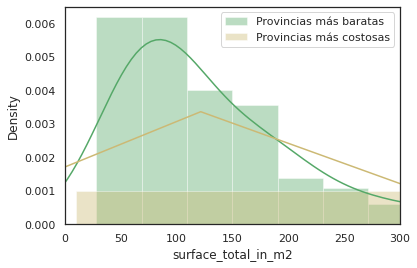

In [ ]:
# Comparación de provincias por superficie total en m2.
prov_sup_m2 = sns.distplot(df[df.state_name.isin(provincias_economicas)].surface_total_in_m2, label="Provincias más baratas", color ="g")
sns.distplot(df[df.state_name.isin(provincias_costosas)].surface_total_in_m2, label="Provincias más costosas", color ="y")
prov_sup_m2.set_xlim(0, 300)
plt.legend()

## Analisis de precios según el tipo de propiedad

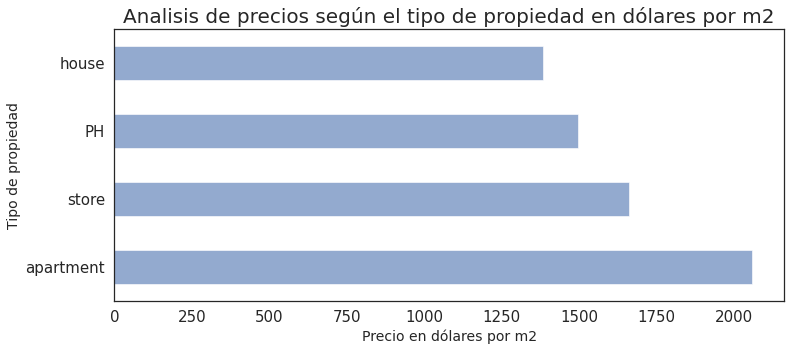

In [ ]:
tipos_propiedades = df.groupby('property_type').mean()['price_usd_per_m2'].sort_values(ascending=False)
grafico_tipos_prop = tipos_propiedades.plot.barh(figsize=(12,5),fontsize=15, color='b', alpha=0.6)
grafico_tipos_prop.set_title("Analisis de precios según el tipo de propiedad en dólares por m2", fontsize=20)
grafico_tipos_prop.set_ylabel("Tipo de propiedad", fontsize=14)
grafico_tipos_prop.set_xlabel("Precio en dólares por m2", fontsize=14)
plt.show()

## Cantidad de ambientes por tipo de propiedad.

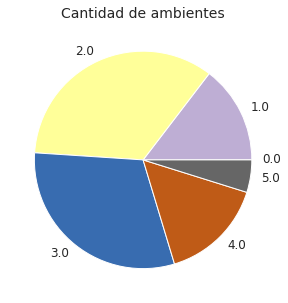

In [ ]:
# excluimos las propiedades con más de 5 ambientes porque cosnidemos que no aportan información relevante para el posterior análisis.
# basamos esta afirmación en la tendencia de cantidad de ambientes por propiedad
# no realizamos distinción por tipo de propiedad 
rooms = df.loc[df['rooms'] < 6,['rooms','price_usd_per_m2']]
agrupamiento = rooms.groupby('rooms').size().plot(kind='pie', figsize=(5,5),cmap='Accent',fontsize=12)
plt.title('Cantidad de ambientes', fontsize = 14)
plt.ylabel('')
plt.show()

# Gráfica GEOPANDAS

#### Para obtener una clara visión y entendimiento de la distribución a nivel nacional de las porpiedades publicadas para venta en Properati y poder establecer visualmente el nivel de relevancia por provincia de las mismas, realizamos la siguente gráfica.

In [ ]:
# Definimos la función para graficar mediante la librería Geopandas y Basemap
def graficar_propiedades(df):
    figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    latitude= -38
    longitude = -60
    m = Basemap(
                ax=axes,
                projection='cyl',
                lon_0=longitude, lat_0=latitude,
                llcrnrlat=latitude - 18.0, urcrnrlat=latitude + 18.0,
                llcrnrlon=longitude - 20.0, urcrnrlon=longitude + 20.0,
                resolution='i'
                )
    m.drawmapboundary(fill_color='#81c0da')
    m.fillcontinents(color='#e3e1a5',lake_color='#81c0da')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()

    # Plot the geolocical events as blue dots
    (x, y) = m(df.lon, df.lat )
    m.plot(x, y, 'bo', alpha=0.5, color = 'coral')
    (x, y) = m([longitude], [latitude])
    m.plot(x, y, 'rx', markersize=15.0, color = 'coral')

    plt.title('Ubicacion de propiedades',fontsize=23)
    plt.show()

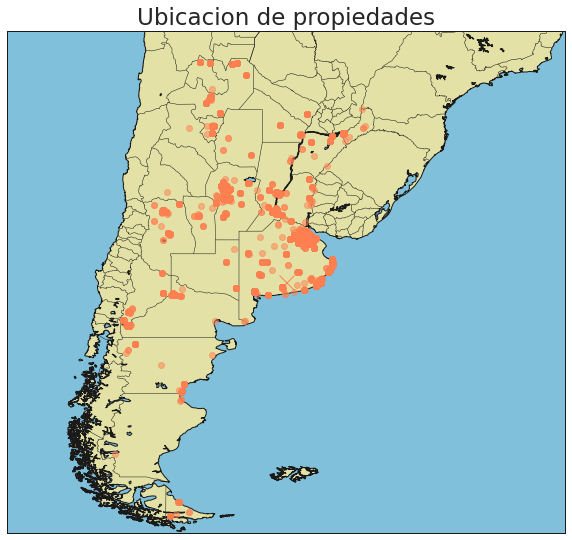

In [ ]:
# ejecutamos la función definida ingresando como parámetro nuestro dataframe
# en este punto utilizamos las latitudes y longitudes disponibles en el dataframe, aquellas que no se encontraban disponibles fueron previamente completadas en una etapa anterior
graficar_propiedades(df)

# Detección de posibles atributos útiles para la eteapa de regresión lineal

#### Utilizamos la columna description para detectar atributos que consideramos podrían ser útiles en la próxima etapa porque el precio puede variar con la asuencia o presencia de los mismos. Adicionamos cada atributo en distintas columnas del dataframe.

In [ ]:
# Detección del atributo a estrenar
df['A Estrenar'] = pd.get_dummies(df['description'].str.contains(r'[Ee]strenar|[Ee]strenar', re.IGNORECASE)).iloc[:, 1:]
df['A Estrenar'].sum()

3877

In [ ]:
# Detección del atributo baño en suite
df['Baño en Suite'] = pd.get_dummies(df['description'].str.contains(r'en suite', re.IGNORECASE)).iloc[:, 1:]
df['Baño en Suite'].sum()

8448

In [ ]:
# Detección del atributo duplex
df['Tipo Duplex'] = pd.get_dummies(df['description'].str.contains(r'[Dd]uplex | [Dd]úplex', re.IGNORECASE)).iloc[:, 1:]
df['Tipo Duplex'].sum()

1963

In [ ]:
# Detección del atributo lavadero
df['Lavadero'] = pd.get_dummies(df['description'].str.contains(r'[Ll]avadero', re.IGNORECASE)).iloc[:, 1:]
df['Lavadero'].sum()

15142

In [ ]:
# Detección del atributo "cancha de tenis"
df['Cancha_tenis'] = pd.get_dummies(df['description'].str.contains(r'[Tt]enis | [Tt]ennis  ', re.IGNORECASE)).iloc[:, 1:]
df['Cancha_tenis'].sum()

355

In [ ]:
# Detección del atributo club house o sum
df['Club_house'] = pd.get_dummies(df['description'].str.contains(r'[Cc]lub\s[Hh]ouse | [Ss]um', re.IGNORECASE)).iloc[:, 1:]
df['Club_house'].sum()

2713

In [ ]:
# Detección del atributo pileta/piscina
df['Piscina'] = pd.get_dummies(df['description'].str.contains(r'[pP]isci|[pP]isin|[pP]isci|[Pp]ileta', re.IGNORECASE)).iloc[:, 1:]
df['Piscina'].sum()

12940

In [ ]:
# nueva columna propiedades con gimnasio
df['Gimnasio'] = pd.get_dummies(df['description'].str.contains(r'[Gg][iy]m', re.IGNORECASE)).iloc[:, 1:]
(df['Gimnasio']==1).sum()

3595

In [ ]:
# nueva columna propiedades con Garaje
df['Garaje'] = pd.get_dummies(df['description'].str.contains(r'[Cc]ochera|[Gg]arag', re.IGNORECASE)).iloc[:, 1:]
df['Garaje'].sum()

19127

In [ ]:
# nueva columna apto prefesional
df['Apto Profesional'] = pd.get_dummies(df['description'].str.contains(r'[Aa]pto\s\d+ | [Pp]rofesional\s\d+', re.IGNORECASE)).iloc[:, 1:]
df['Apto Profesional'].sum()

43

In [ ]:
# nueva columna frente
df['Frente'] = pd.get_dummies(df['description'].str.contains(r'\s[Ff]rente', re.IGNORECASE)).iloc[:, 1:]
df['Frente'].sum()

13673

In [ ]:
# nueva columna contrafrente
df['Contrafrente'] = pd.get_dummies(df['description'].str.contains(r'\scontrafrente', re.IGNORECASE)).iloc[:, 1:]
df['Contrafrente'].sum()

3479

## Matriz de correlación en los datos filtrados del dataset

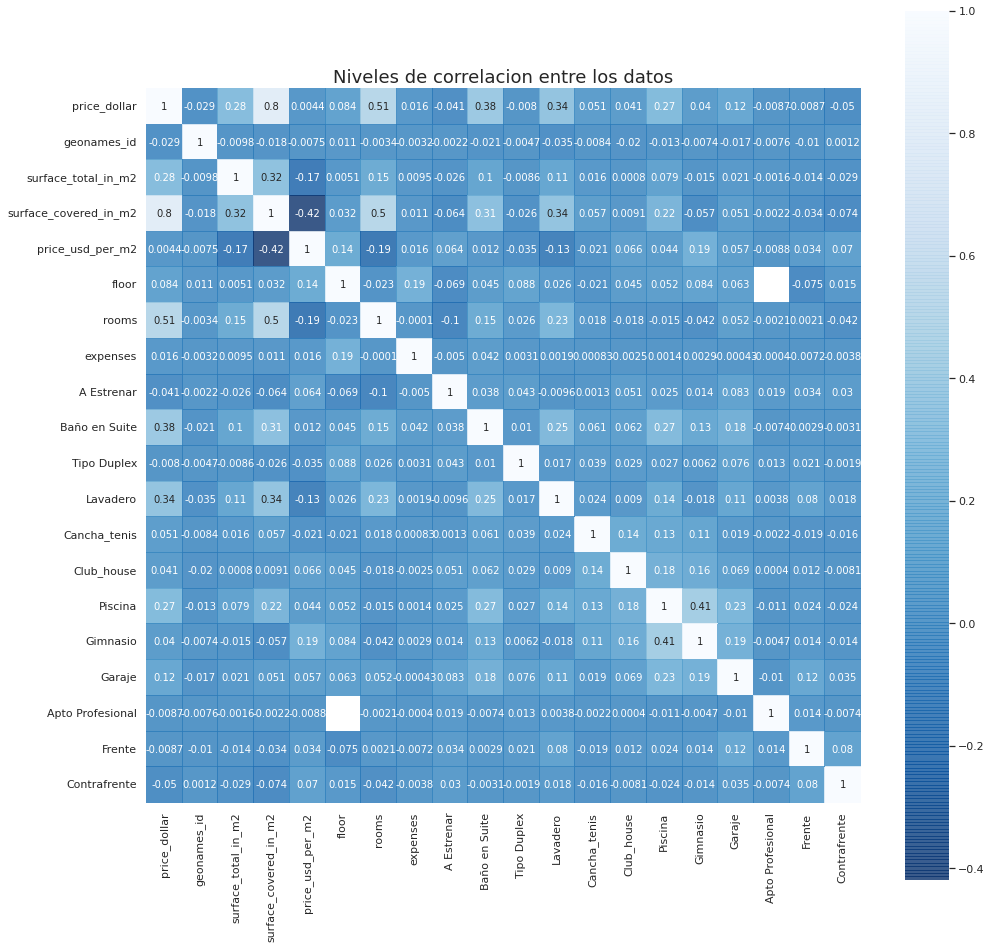

In [ ]:
# Graficamos la matriz de correlación de las variables del DataFrame para intentar determinar el grado de correlación 
# entre cada una de las variables del modelo y establecer nuevas maneras de realizar análisis y obtener conclusiones
df3 = df[(df.price_dollar < df.price_dollar.quantile(.95)) & 
                               (df.price_dollar > df.price_dollar.quantile(.02))]
df4 = df3.iloc[:,[29, 1, 5, 6, 7, 14, 15, 16, 18, 19, 20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]]
fig, ax = plt.subplots(figsize=(16,16))
ax.set_title('Niveles de correlacion entre los datos', fontsize=18)       
sns.heatmap(df4.corr() , square=True, annot=True, cmap='Blues_r', alpha=0.8, ax=ax);
plt.show();

# Salida del dataframe en formato csv

In [ ]:
# generar una salida en formato CSV para poder realizar un analisis con excel de los casos restantes. Se aloja en carpeta: WS1
#df.to_csv('properatti_salida.csv')
#!cp properatti_salida.csv "/content/drive/MyDrive/WS1/"